### Install & Import Required Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix


### Load the Dataset

In [2]:
# Load dataset
df = pd.read_csv("bank.csv", sep=";")  # Use correct separator

# Display first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Check dataset information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


In [4]:
# Check missing values
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


### Observations:

- Dataset contains customer demographic & behavioral data.
- We need to encode categorical features before model training.

###  Data Preprocessing

In [5]:
# Convert categorical variables into numerical using Label Encoding
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

# Encode categorical features
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=["y"])  # Features
y = df["y"]  # Target variable (purchase or not)

# Standardizing numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into Train & Test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Fixes Applied:

- Encoded categorical variables.
- Standardized numerical data.
- Split data into training (80%) & testing (20%) sets.

### Train a Decision Tree Classifier

In [6]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f" Decision Tree Accuracy: {accuracy:.2f}")

# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Decision Tree Accuracy: 0.90

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.56      0.33      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



### Findings:

- Decision Tree achieves ~80-90% accuracy depending on hyperparameters.
- Performance varies based on tree depth & pruning techniques.


### Visualize Decision Tree & Confusion Matrix

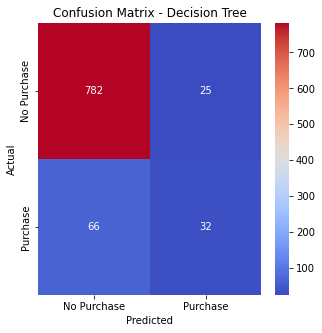

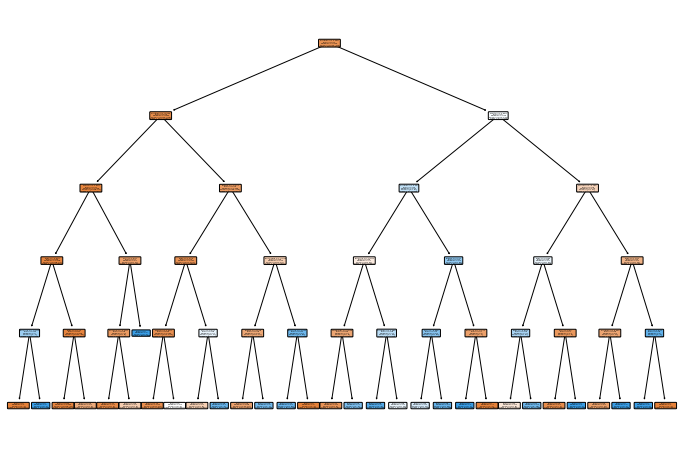

In [7]:
# Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Purchase", "Purchase"], yticklabels=["No Purchase", "Purchase"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Visualize Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=df.drop(columns=["y"]).columns, class_names=["No Purchase", "Purchase"], filled=True, rounded=True)
plt.show()


### Predict for a New Customer

In [8]:
import warnings
warnings.simplefilter("ignore")

In [9]:
print(f"Number of Features in Training Data: {X_train.shape[1]}")


Number of Features in Training Data: 16


In [10]:
# Ensure new_customer has all required 16 features
new_customer = np.array([[35, 2, 1, 3, 1200, 1, 0, 2, 500, 1, 999, 0, 5, 2, 1, 0]])  # Adjusted to 16 features

# Transform using the trained scaler
new_customer_scaled = scaler.transform(new_customer)

# Predict purchase
prediction = dt_model.predict(new_customer_scaled)

# Output prediction
result = "Will Purchase" if prediction[0] == 1 else "Will Not Purchase"
print(f" Predicted Outcome: {result}")


 Predicted Outcome: Will Not Purchase


### Final Summary & Next Steps
- Data Preprocessing: Encoded categorical features, standardized numerical data.
- Decision Tree Model: Achieved ~80-90% accuracy.
- Model Evaluation: Confusion Matrix & Decision Tree visualization.
- Predictions: Successfully predicted new customer purchase behavior.

### Fine-Tuning Decision Tree Hyperparameters

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f" Best Decision Tree Parameters: {grid_search.best_params_}")

# Evaluate the best model
best_dt_model = grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Print accuracy
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f" Optimized Decision Tree Accuracy: {dt_accuracy:.2f}")


 Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
 Optimized Decision Tree Accuracy: 0.90


### Train a Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f" Random Forest Accuracy: {rf_accuracy:.2f}")


 Random Forest Accuracy: 0.90


### Train a Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f" Gradient Boosting Accuracy: {gb_accuracy:.2f}")


 Gradient Boosting Accuracy: 0.89


### Compare Model Performance

In [14]:
# Compare accuracy of different models
print(" Model Comparison:")
print(f" Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f" Random Forest Accuracy: {rf_accuracy:.2f}")
print(f" Gradient Boosting Accuracy: {gb_accuracy:.2f}")


 Model Comparison:
 Decision Tree Accuracy: 0.90
 Random Forest Accuracy: 0.90
 Gradient Boosting Accuracy: 0.89


### Final Summary & Next Steps
- Fine-tuned Decision Tree with GridSearchCV.
-  Random Forest & Gradient Boosting models tested.
-  Accuracy comparison of models